## Computing models of modular curves

In this notebook we compute explicit models of modular curves via modular forms.

Lets start with $X_0(11)$ as this is the first modular curve of genus 1.

To construct an explicit embedding of this  curve into projective space we use modualar forms, those for $\Gamma_0(11)$ can be computed via:

In [3]:
M = ModularForms(11); M

Modular Forms space of dimension 2 for Congruence Subgroup Gamma0(11) of weight 2 over Rational Field

there is a 2-dimensional space of such forms, lets call basis elements $f$ and $g$

In [7]:
f,g = M.basis()
show(f)
show(g)

q - 2*q^2 - q^3 + 2*q^4 + q^5 + O(q^6)

1 + 12/5*q + 36/5*q^2 + 48/5*q^3 + 84/5*q^4 + 72/5*q^5 + O(q^6)

Note that $f$ is a cusp form but $g$ is not.

In [10]:
f.is_cuspidal(),g.is_cuspidal()

(True, False)

As differentials on the curve we have
$$\omega_1 = f(q) \frac{\mathrm{d} q}{q},\,\omega_2 = g(q) \frac{\mathrm{d} q}{q}$$
where $\omega_1$ is regular at the cusp $\infty$ and $\omega_2$ has a pole at $\infty$.

So in order to construct a model of this genus $1$ curve we will assume we have functions $x,y$ on the curve which as in a genus $1$ curve satisfy $y^2 = h(x)$ for a quartic polynomial $h(x)$.

Then $\mathrm d x/y$ and $x\mathrm d x/y$ are differentials on the curve which we can equate with $\omega_1, \omega_2$ to solve for $x,y$.

If
$$\omega_1 = \frac{\mathrm{d} x}{y},\,\omega_2 = \frac{x\mathrm{d} x}{y}$$
then
$$x = \omega_2/\omega_1 = g(q)\mathrm d q/f (q) \mathrm d q = g(q)/f(q)$$
and 
$$y = \mathrm d x /\omega_1 = q \mathrm d x /f (q)$$

In [13]:
x = g.qexp(20)/f.qexp(20)
show(x)

q^-1 + 22/5 + 17*q + 46*q^2 + 116*q^3 + 252*q^4 + 533*q^5 + 1034*q^6 + 1961*q^7 + 3540*q^8 + 6253*q^9 + 10654*q^10 + 17897*q^11 + 29284*q^12 + 47265*q^13 + 74868*q^14 + 117158*q^15 + 180608*q^16 + 275562*q^17 + O(q^18)

In [16]:
q = x.parent().gen()
y = q*x.derivative()/f.qexp(20)
show(y)

-q^-2 - 2*q^-1 + 12 + 116*q + 597*q^2 + 2298*q^3 + 7616*q^4 + 22396*q^5 + 60732*q^6 + 153682*q^7 + 368584*q^8 + 843150*q^9 + 1855509*q^10 + 3943764*q^11 + 8136120*q^12 + 16338586*q^13 + 32038879*q^14 + 61475598*q^15 + 115674856*q^16 + O(q^17)

Now if we assume that we have an equation of the form
$$y^2 = h(x)$$
for a quartic $h(x)$ we have to solve for the coefficients of $h$, given $y^2, x^4, x^3, x^2, x, 1$.

To do this we construct the relevant linear system, including terms up to degree $q^{-6}$.

In [24]:
def coeffs(G):                                                     
    return ([0]*(6+G.valuation()) +G.coefficients())[:16]
M = Matrix(list(map(coeffs, [y^2, x^4, x^3, x^2, x])) + [6*[0] + [1] + 9*[0]])
show(M.kernel())

Vector space of degree 6 and dimension 1 over Rational Field
Basis matrix:
[       1       -1     68/5   616/25  252/125 1504/625]

Hence the equation of our curve is
$$
y^2 = x^4 - \frac{68}5 x^3 - \frac{616}{25}x^2 - \frac{252}{125}x - \frac{1504}{625}
$$
or after a change of variables ($y \mapsto y/25,x \mapsto x/5$)
$$
y^2 = x^4 - 68 x^3 - 616x^2 - 252x - 1504
$$
we should do a little more cleanup to get to a nicer model with an odd degree polynomial in $x$. This amounts to moving a Weierstrass point to infinity.

Do we have any Weierstrass points here?:

In [25]:
X = polygen(QQ)
(X^4 - 68*X^3 - 616*X^2 - 252*X - 1504).factor()

(x + 8) * (x^3 - 76*x^2 - 8*x - 188)

Yes $x = -8$ is a rational Weierstrass point, to get the equation of the new curve we shift this point to $0$ and then take $x\mapsto1/x$, this has the effect of reversing the polynomial $h$.

In [29]:
(X^4 - 68*X^3 - 616*X^2 - 252*X - 1504).subs({X:X-8}).reverse()

-5500*x^3 + 1400*x^2 - 100*x + 1

$$ y^2 = -5500x^3 + 1400x^2 - 100x + 1$$
is now our model, one last change of variables gives.

In [58]:
(X^4 - 68*X^3 - 616*X^2 - 252*X - 1504).subs({X:X-8}).reverse().subs({X:X/(-5500)})*(-5500)^2

x^3 + 1400*x^2 + 550000*x + 30250000

$$y^2 =x^3 + 1400x^2 + 550000x + 30250000$$
Which, while the coefficients are a little excessive is in short weierstrass form, so we can use the standard Sage elliptic curve constructor now:

In [38]:
E = EllipticCurve([0, 1400, 0, 550000, 30250000]); show(E)

Elliptic Curve defined by y^2 = x^3 + 1400*x^2 + 550000*x + 30250000 over Rational Field

We can check that the conductor is $11$, and ask for a minimal model at this point:

In [37]:
E.conductor()

11

In [43]:
E.minimal_model()

Elliptic Curve defined by y^2 + y = x^3 - x^2 - 10*x - 20 over Rational Field

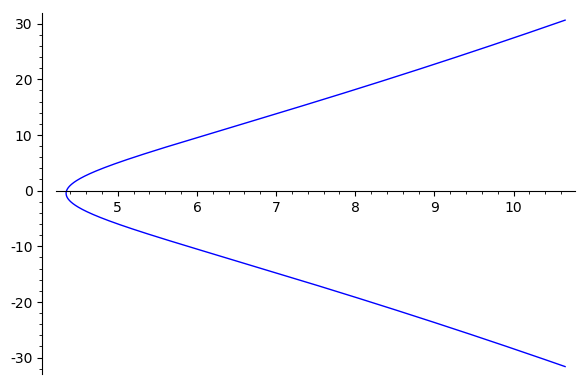

In [45]:
E.minimal_model().plot()

In [49]:
E.torsion_points()

[(0 : -5500 : 1),
 (0 : 1 : 0),
 (0 : 5500 : 1),
 (1100 : -60500 : 1),
 (1100 : 60500 : 1)]